# Gibbs sampling illustration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
%config InlineBackend.figure_format = "retina"

In [2]:
μ = np.zeros(2)
Σ = np.array([[1, 0.99], [0.99, 1]])
mvn = multivariate_normal(μ, Σ)

In [3]:
X = np.mgrid[-3:3:0.01, -3:3:0.01]
density = np.apply_along_axis(mvn.pdf, 0, X)

In [4]:
-1/2,-1;
-1/2,0;
1,0;
1,1;
-1/2,1;
-1/2,1/2;
1.5,1/2;
1.5,1.5;

In [5]:
x = np.array([-1/2, -1])

n_steps = 150
x_hist = np.zeros((n_steps, 2))
x_hist[0, :] = np.array([-1/2, -1]) 

for n in range(1, n_steps):
    Σ0_cond = Σ[0,0] - Σ[0, 1] * Σ[1, 0] / Σ[1, 1]
    μ0_cond = μ[0] + Σ[0, 1] * (x_hist[n-1, 1] - μ[1]) / Σ[1, 1]
    x_hist[n, 0] = norm(μ0_cond, Σ0_cond).rvs()
    
    Σ1_cond = Σ[1,1] - Σ[1, 0] * Σ[0, 1] / Σ[0, 0]
    μ1_cond = μ[1] + Σ[1, 0] * (x_hist[n, 0] - μ[0]) / Σ[0, 0]
    x_hist[n, 1] = norm(μ0_cond, Σ0_cond).rvs()
    

In [6]:
blue_seq = np.array([
    [-1/2,-1],
    [-1/2,0],
    [1,0],
    [1,1],
    [-1/2,1],
    [-1/2,1/2],
    [1.5,1/2],
    [1.5,1.5],
]) / 3

In [8]:
x0_range = np.arange(-2, 2, 0.01)
x0_obs = 0.7
Σ0_cond = Σ[0,0] - Σ[0, 1] * Σ[1, 0] / Σ[1, 1]
μ0_cond = μ[0] + Σ[0, 1] * (x0_obs - μ[1]) / Σ[1, 1]


x1_range = np.arange(-2, 2, 0.01)
x1_obs = 0.7
Σ1_cond = Σ[1,1] - Σ[1, 0] * Σ[0, 1] / Σ[0, 0]
μ1_cond = μ[1] + Σ[1, 0] * (x1_obs - μ[0]) / Σ[0, 0]

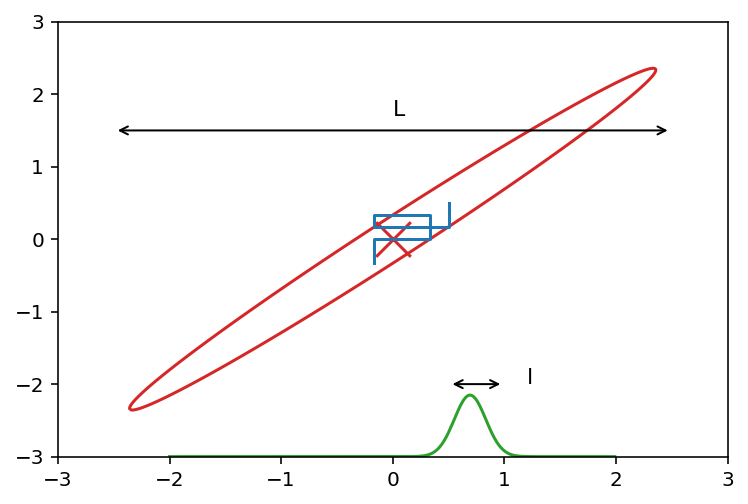

In [9]:
plt.plot(*blue_seq.T)
plt.contour(*X, density, levels=[0.07], colors="tab:red")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(0, 0, marker="x", c="tab:red", s=300)
plt.text(0, 1.7, "L", size=11)
plt.text(1.2, -2, "l", size=11)
plt.annotate(text="", xy=(-2.5, 1.5), xytext=(2.5, 1.5), arrowprops=dict(arrowstyle='<->'))
plt.annotate(text="", xy=(0.5, -2), xytext=(1, -2), arrowprops=dict(arrowstyle='<->'))
# Scaled down and shifted marginal gaussian
plt.plot(x0_range, norm(μ0_cond, np.sqrt(Σ0_cond)).pdf(x0_range)* 0.3 - 3, c="tab:green")